In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from pathlib import Path
import seaborn as sns

# 한글 폰트 설정
def set_korean_font():
    # 환경에 맞는 폰트 경로를 지정
    font_paths = [
        "C:/Windows/Fonts/malgun.ttf",  # Windows (맑은 고딕)
    ]
    for fp in font_paths:
        if Path(fp).exists():
            plt.rc('font', family=fm.FontProperties(fname=fp).get_name())
            break
    plt.rcParams['axes.unicode_minus'] = False  # 마이너스 깨짐 방지

set_korean_font()


In [4]:
df = pd.read_csv('alzheimers_disease_data.csv')
df

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge
0,4751,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,...,0,0,1.725883,0,0,0,1,0,0,XXXConfid
1,4752,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,...,0,0,2.592424,0,0,0,0,1,0,XXXConfid
2,4753,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,...,0,0,7.119548,0,1,0,1,0,0,XXXConfid
3,4754,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,...,0,1,6.481226,0,0,0,0,0,0,XXXConfid
4,4755,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,...,0,0,0.014691,0,0,1,1,0,0,XXXConfid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2144,6895,61,0,0,1,39.121757,0,1.561126,4.049964,6.555306,...,0,0,4.492838,1,0,0,0,0,1,XXXConfid
2145,6896,75,0,0,2,17.857903,0,18.767261,1.360667,2.904662,...,0,1,9.204952,0,0,0,0,0,1,XXXConfid
2146,6897,77,0,0,1,15.476479,0,4.594670,9.886002,8.120025,...,0,0,5.036334,0,0,0,0,0,1,XXXConfid
2147,6898,78,1,3,1,15.299911,0,8.674505,6.354282,1.263427,...,0,0,3.785399,0,0,0,0,1,1,XXXConfid


In [5]:
# 나이대 구간을 지정
bins = [59, 69, 79, 89, 150]
labels = ['60s', '70s', '80s', '90s+']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=True)

# Diagnosis 별로 나이대 그룹에 따라 평균 수치를 구함
grouped = df.groupby(['Diagnosis', 'AgeGroup']).mean(numeric_only=True)

# 보기 좋게 정리 (Diagnosis 0, 1 나눠서 각각 따로 보기 위해 unstack)
grouped_transposed = grouped.transpose()
grouped_transposed


C:\Users\use08\AppData\Local\Temp\ipykernel_40452\1761911316.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby(['Diagnosis', 'AgeGroup']).mean(numeric_only=True)


Diagnosis                            0                                         \
AgeGroup                           60s          70s          80s         90s+   
PatientID                  5800.955654  5789.949782  5824.178241  5848.062500   
Age                          64.691796    74.360262    84.597222    90.000000   
Gender                        0.478936     0.532751     0.525463     0.562500   
Ethnicity                     0.660754     0.746725     0.706019     0.812500   
EducationLevel                1.401330     1.301310     1.224537     1.479167   
BMI                          27.873886    27.299273    27.437972    26.897284   
Smoking                       0.279379     0.296943     0.284722     0.375000   
AlcoholConsumption           10.080136    10.060619    10.057201    10.233860   
PhysicalActivity              4.923337     4.926977     4.844462     5.144261   
DietQuality                   5.105720     4.858973     5.003502     4.592697   
SleepQuality                  7.066449     7.096411     7.254090     6.781241   
FamilyHistoryAlzheimers       0.266075     0.275109     0.240741     0.312500   
CardiovascularDisease         0.146341     0.122271     0.136574     0.166667   
Diabetes                      0.139690     0.185590     0.157407     0.104167   
Depression                    0.228381     0.174672     0.201389     0.229167   
HeadInjury                    0.110865     0.100437     0.081019     0.083333   
Hypertension                  0.121951     0.159389     0.131944     0.187500   
SystolicBP                  135.751663   133.676856   134.581019   131.729167   
DiastolicBP                  89.381375    90.550218    89.430556    89.291667   
CholesterolTotal            224.507553   223.726209   227.411224   219.974151   
CholesterolLDL              126.501800   125.134234   124.652199   123.197738   
CholesterolHDL               58.751563    59.297148    57.966903    60.123566   
CholesterolTriglycerides    227.377530   225.436344   229.104049   207.037600   
MMSE                         16.608800    16.149616    16.104340    15.597321   
FunctionalAssessment          5.785728     5.886631     5.890334     6.050097   
MemoryComplaints              0.126386     0.111354     0.108796     0.125000   
BehavioralProblems            0.088692     0.091703     0.104167     0.145833   
ADL                           5.926578     5.702699     5.587971     4.783708   
Confusion                     0.203991     0.216157     0.212963     0.208333   
Disorientation                0.155211     0.161572     0.178241     0.166667   
PersonalityChanges            0.164080     0.137555     0.166667     0.166667   
DifficultyCompletingTasks     0.139690     0.170306     0.159722     0.145833   
Forgetfulness                 0.319290     0.292576     0.296296     0.270833   

Diagnosis                            1                                         
AgeGroup                           60s          70s          80s         90s+  
PatientID                  5866.016000  5905.273469  5823.487179  5714.612903  
Age                          64.284000    74.342857    84.636752    90.000000  
Gender                        0.496000     0.510204     0.478632     0.419355  
Ethnicity                     0.688000     0.644898     0.722222     0.516129  
EducationLevel                1.284000     1.220408     1.205128     1.129032  
BMI                          28.088540    27.173874    28.719926    26.239766  
Smoking                       0.300000     0.273469     0.286325     0.258065  
AlcoholConsumption            9.742047    10.116833    10.054564    10.258549  
PhysicalActivity              4.931021     5.119390     4.789297     4.809698  
DietQuality                   5.247524     4.797950     4.970647     5.473921  
SleepQuality                  6.754652     6.857870     7.082299     7.428476  
FamilyHistoryAlzheimers       0.248000     0.224490     0.235043     0.161290  
CardiovascularDisease         0.152000     0

C:\Users\use08\AppData\Local\Temp\ipykernel_40452\329552883.py:17: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(
C:\Users\use08\AppData\Local\Temp\ipykernel_40452\329552883.py:17: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(
C:\Users\use08\AppData\Local\Temp\ipykernel_40452\329552883.py:17: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(
C:\Users\use08\AppData\Local\Temp\ipykernel_40452\329552883.py:17: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(
C:\Users\use08\AppData\Local\Temp\ipykernel_40452\329552883.py:17: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(
C:\Users\use08\AppData\Local\Temp\ipykernel_40452\329552883.py:17: FutureWarning: 

The `ci` parameter is deprecated. Use `er

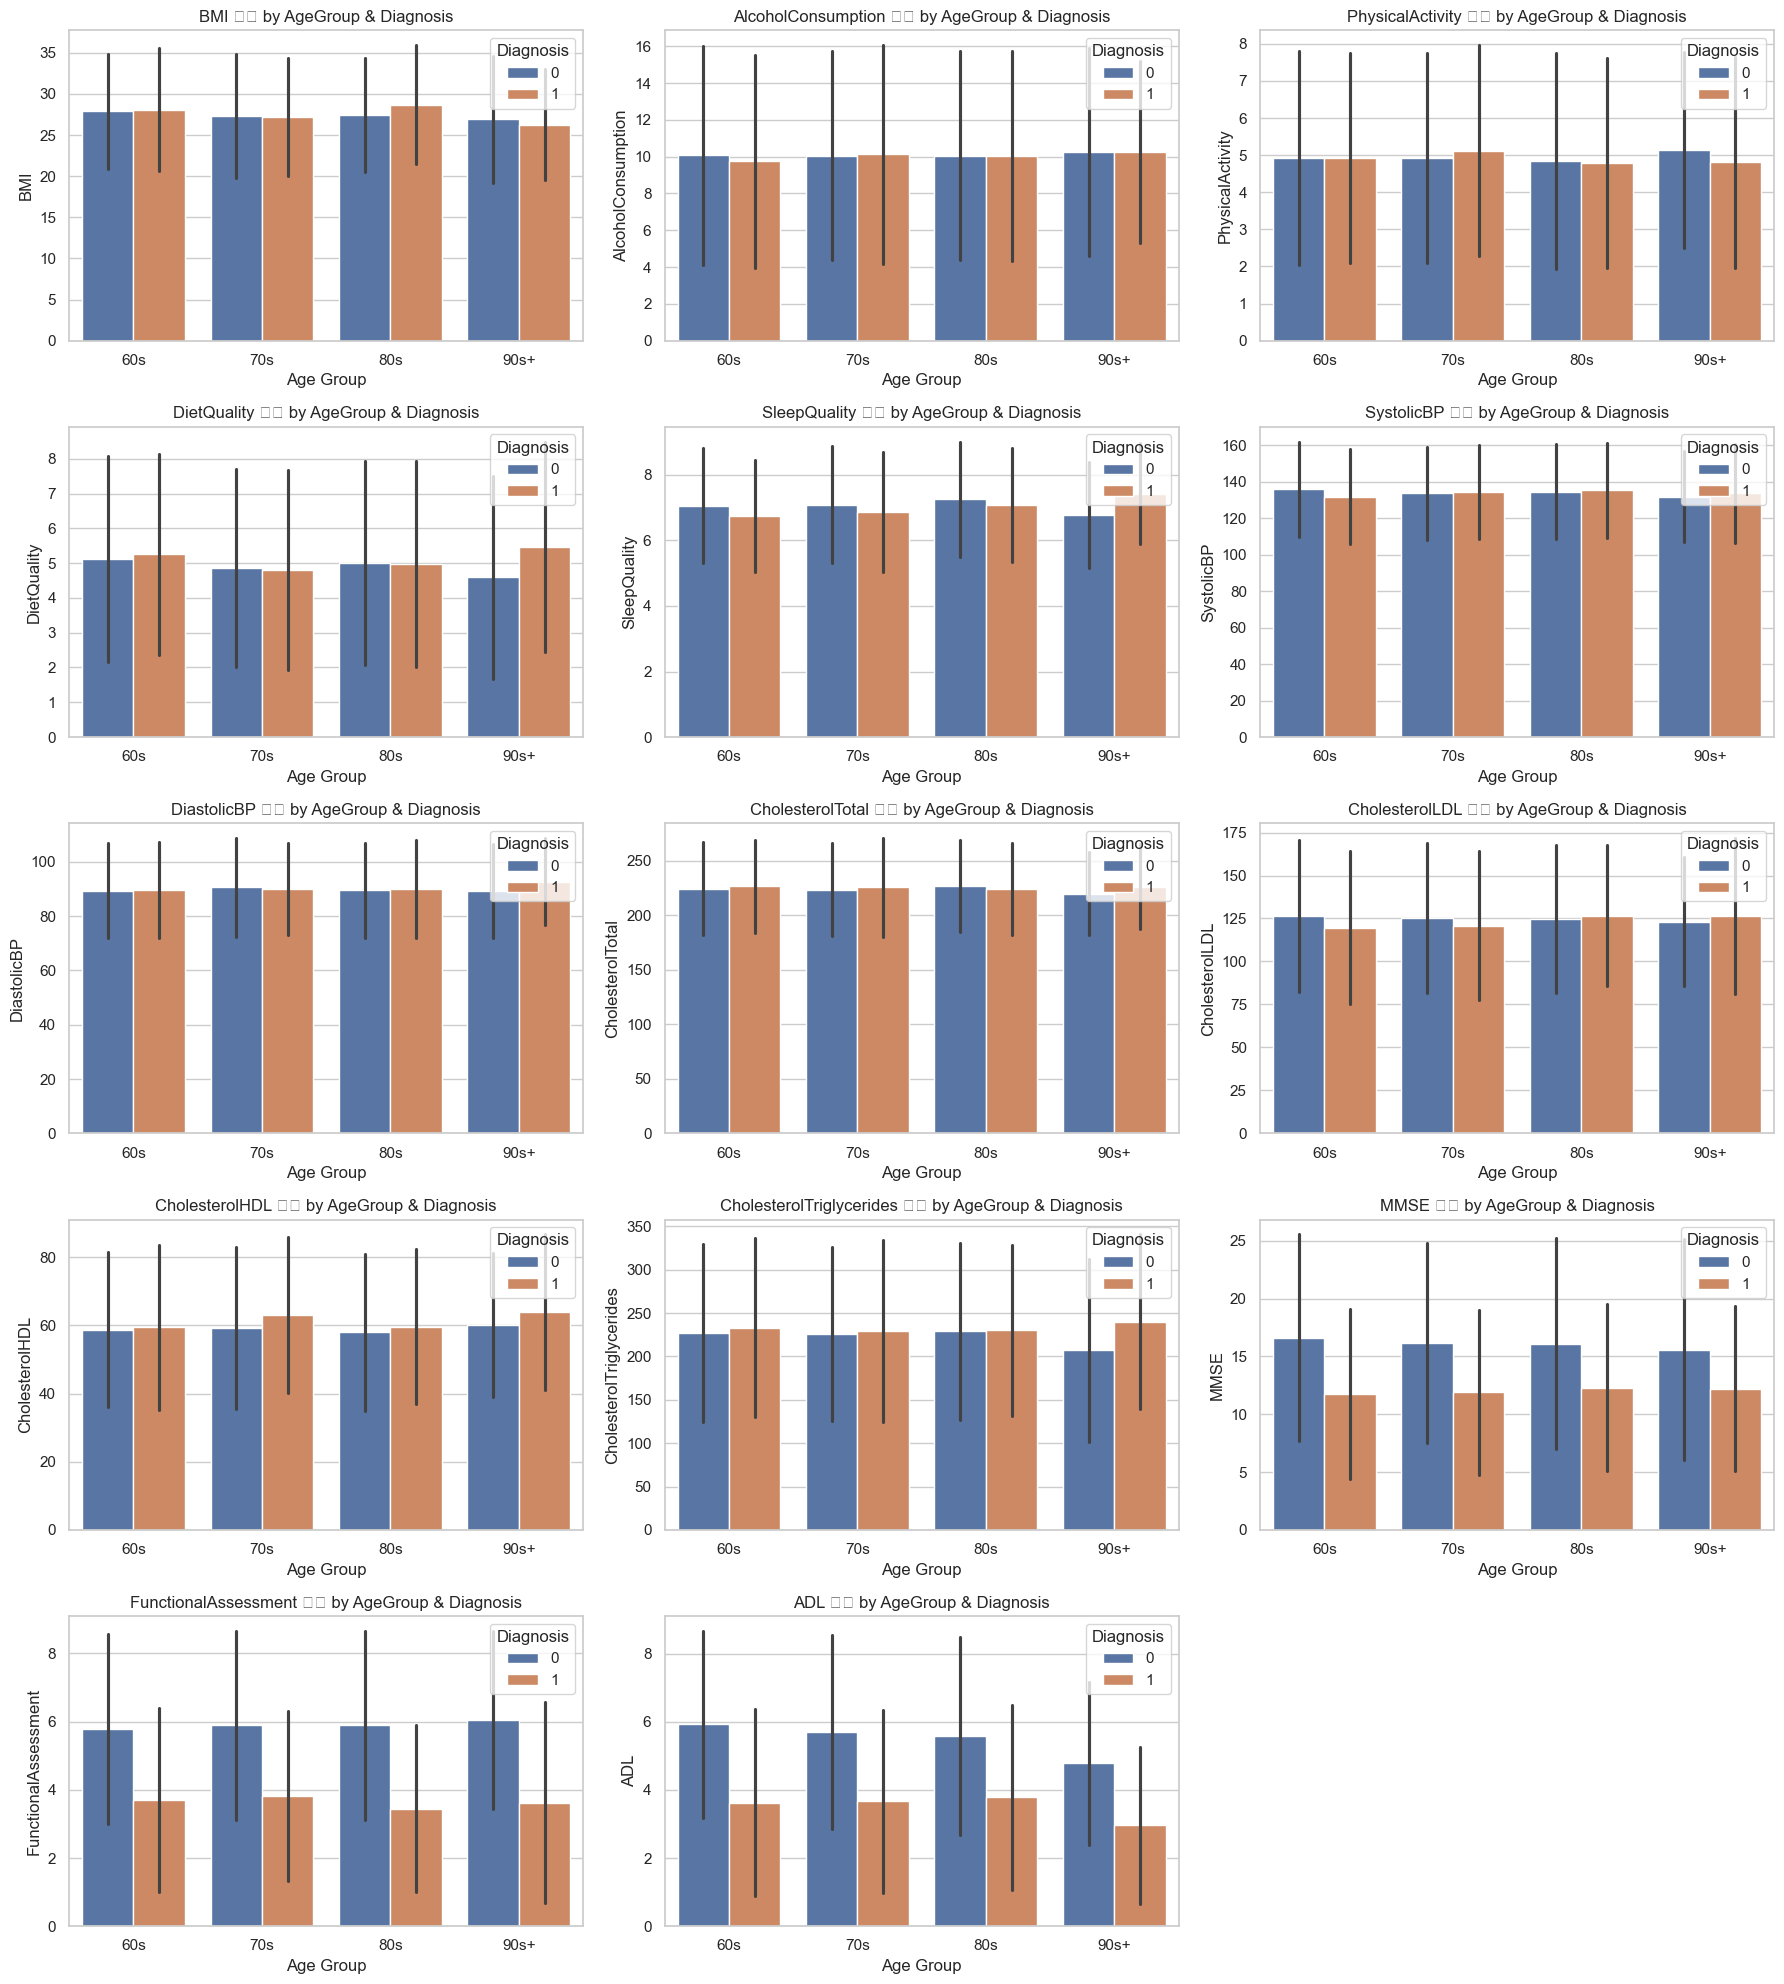

In [6]:


# 시각화에 사용할 컬럼만 추출 (의미있는 연속형 변수 중심)
selected_columns = [
    'BMI', 'AlcoholConsumption', 'PhysicalActivity', 'DietQuality',
    'SleepQuality', 'SystolicBP', 'DiastolicBP', 'CholesterolTotal',
    'CholesterolLDL', 'CholesterolHDL', 'CholesterolTriglycerides',
    'MMSE', 'FunctionalAssessment', 'ADL'
]

# 플롯 크기 설정
sns.set(style="whitegrid")
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(18, 20))
axes = axes.flatten()

# 변수별 시각화
for i, col in enumerate(selected_columns):
    ax = axes[i]
    sns.barplot(
        data=df,
        x='AgeGroup',
        y=col,
        hue='Diagnosis',
        estimator='mean',
        ci='sd',
        ax=ax
    )
    ax.set_title(f'{col} 평균 by AgeGroup & Diagnosis')
    ax.set_ylabel(col)
    ax.set_xlabel('Age Group')
    ax.legend(title='Diagnosis', loc='upper right')

# 남은 subplot 비우기
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


| 영어 변수명                      | 한글 번역                                 |
| --------------------------- | ------------------------------------- |
| `PatientID`                 | 환자 ID                                 |
| `Age`                       | 나이                                    |
| `Gender`                    | 성별                                    |
| `Ethnicity`                 | 인종                                    |
| `EducationLevel`            | 교육 수준                                 |
| `BMI`                       | 체질량지수 (BMI)                           |
| `Smoking`                   | 흡연 여부                                 |
| `AlcoholConsumption`        | 음주량                                   |
| `PhysicalActivity`          | 신체활동 수준                               |
| `DietQuality`               | 식단의 질                                 |
| `SleepQuality`              | 수면의 질                                 |
| `FamilyHistoryAlzheimers`   | 알츠하이머 가족력                             |
| `CardiovascularDisease`     | 심혈관 질환 여부                             |
| `Diabetes`                  | 당뇨병 여부                                |
| `Depression`                | 우울증 여부                                |
| `HeadInjury`                | 두부 외상 여부                              |
| `Hypertension`              | 고혈압 여부                                |
| `SystolicBP`                | 수축기 혈압                                |
| `DiastolicBP`               | 이완기 혈압                                |
| `CholesterolTotal`          | 총 콜레스테롤                               |
| `CholesterolLDL`            | LDL 콜레스테롤 (나쁜 콜레스테롤)                  |
| `CholesterolHDL`            | HDL 콜레스테롤 (좋은 콜레스테롤)                  |
| `CholesterolTriglycerides`  | 중성지방                                  |
| `MMSE`                      | 간이 정신상태 검사 점수 (MMSE)                  |
| `FunctionalAssessment`      | 기능 평가 점수                              |
| `MemoryComplaints`          | 기억력 저하 호소                             |
| `BehavioralProblems`        | 행동 문제                                 |
| `ADL`                       | 일상생활수행능력 (Activities of Daily Living) |
| `Confusion`                 | 혼란                                    |
| `Disorientation`            | 방향감각 상실                               |
| `PersonalityChanges`        | 성격 변화                                 |
| `DifficultyCompletingTasks` | 과제 수행의 어려움                            |
| `Forgetfulness`             | 건망증                                   |
| `Diagnosis`                 | 진단 여부 (0: 정상, 1: 알츠하이머)               |
| `DoctorInCharge`            | 담당 의사                                 |
| `AgeGroup`                  | 나이대 (60s, 70s 등)                      |


C:\Users\use08\AppData\Local\Temp\ipykernel_40452\1356332666.py:48: UserWarning: Glyph 51452 (\N{HANGUL SYLLABLE JU}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\use08\AppData\Local\Temp\ipykernel_40452\1356332666.py:48: UserWarning: Glyph 50836 (\N{HANGUL SYLLABLE YO}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\use08\AppData\Local\Temp\ipykernel_40452\1356332666.py:48: UserWarning: Glyph 48320 (\N{HANGUL SYLLABLE BYEON}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\use08\AppData\Local\Temp\ipykernel_40452\1356332666.py:48: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\use08\AppData\Local\Temp\ipykernel_40452\1356332666.py:48: UserWarning: Glyph 51473 (\N{HANGUL SYLLABLE JUNG}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\use08\AppData\Local\Temp\ipykernel_40452\1356332666.py:48: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from font(s) Arial.
  plt.tight_la

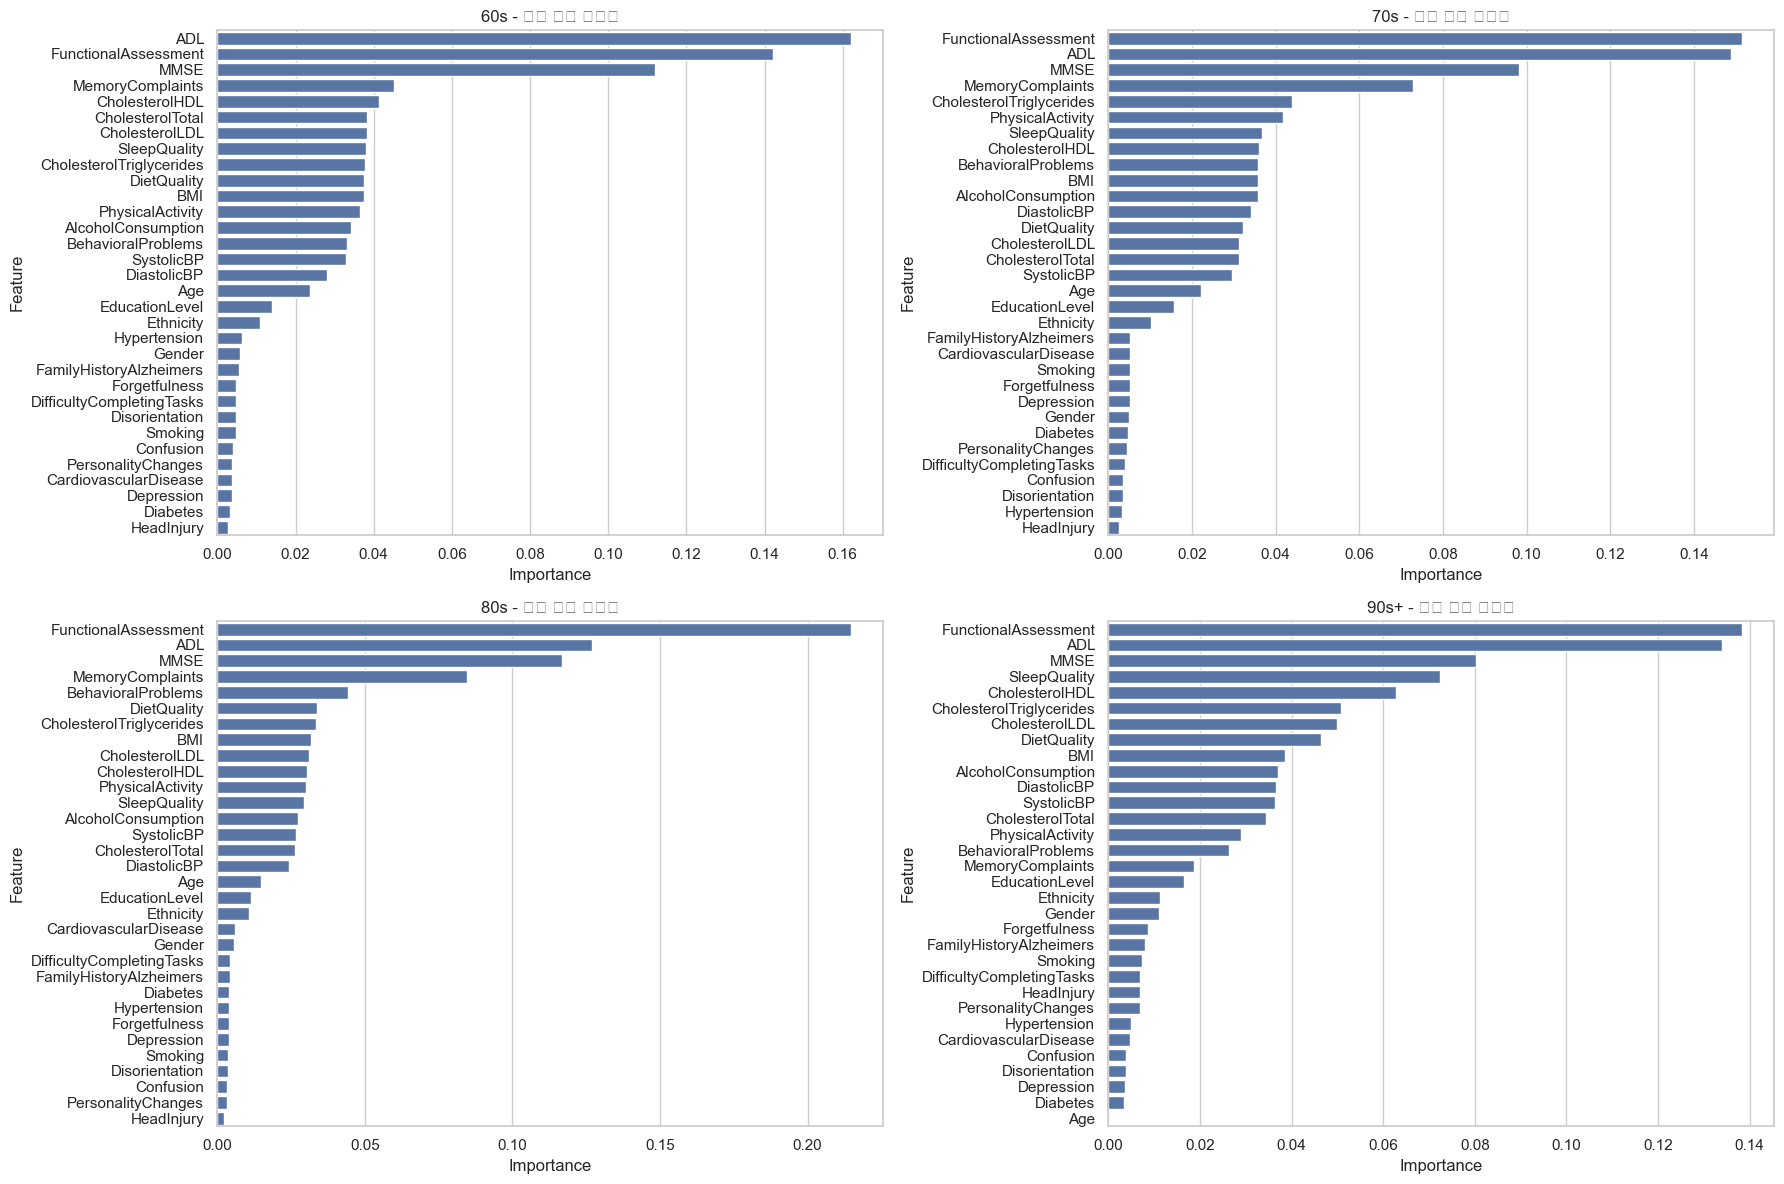

In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
import numpy as np

# 사용할 feature: Diagnosis, DoctorInCharge, PatientID, AgeGroup은 제외
feature_cols = df.select_dtypes(include=[np.number]).columns.difference(['Diagnosis', 'PatientID'])
X_all = df[feature_cols]
y_all = df['Diagnosis']

# 나이대별 데이터 분할
age_groups = df['AgeGroup'].unique().sort_values()
feature_importance_by_age = {}

# 나이대별로 모델 훈련 및 중요도 저장
for age_group in age_groups:
    subset = df[df['AgeGroup'] == age_group]
    X = subset[feature_cols]
    y = subset['Diagnosis']
    
    model = RandomForestClassifier(n_estimators=100, random_state=42)
    model.fit(X, y)
    
    importance_df = pd.DataFrame({
        'Feature': X.columns,
        'Importance': model.feature_importances_
    }).sort_values(by='Importance', ascending=False)
    
    feature_importance_by_age[age_group] = importance_df

# 결과를 시각화 준비
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
fig, axes = plt.subplots(2, 2, figsize=(18, 12))
axes = axes.flatten()

for i, age_group in enumerate(age_groups):
    ax = axes[i]
    sns.barplot(
        data=feature_importance_by_age[age_group],
        x='Importance',
        y='Feature',
        ax=ax
    )
    ax.set_title(f'{age_group} - 주요 변수 중요도')

plt.tight_layout()
plt.show()


In [8]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split

# 중요도 하위 변수들을 1개부터 9개까지 점진적으로 추가하며 성능 측정
tail_feature_progressive_eval = []

for age_group in age_groups:
    subset = df[df['AgeGroup'] == age_group]
    y = subset['Diagnosis']
    
    # 하위 중요도 9개 변수
    tail_features = feature_importance_by_age[age_group].tail(9)['Feature'].tolist()
    
    for i in range(1, len(tail_features)+1):
        selected = tail_features[:i]
        X = subset[selected]
        
        # train/test split
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.3, random_state=42, stratify=y)
        
        model = RandomForestClassifier(n_estimators=100, random_state=42)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        
        acc = accuracy_score(y_test, y_pred)
        prec = precision_score(y_test, y_pred, zero_division=0)
        rec = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        
        tail_feature_progressive_eval.append({
            'AgeGroup': age_group,
            'NumFeatures': i,
            'FeaturesUsed': ', '.join(selected),
            'Accuracy': acc,
            'Precision': prec,
            'Recall': rec,
            'F1 Score': f1
        })

# 결과를 데이터프레임으로 정리
tail_progressive_df = pd.DataFrame(tail_feature_progressive_eval)
tail_progressive_df



,AgeGroup,NumFeatures,FeaturesUsed,Accuracy,Precision,Recall,F1 Score
0,60s,1,DifficultyCompletingTasks,0.644550,0.000000,0.000000,0.000000
1,60s,2,"DifficultyCompletingTasks, Disorientation",0.644550,0.000000,0.000000,0.000000
2,60s,3,"DifficultyCompletingTasks, Disorientation, Smo...",0.644550,0.000000,0.000000,0.000000
3,60s,4,"DifficultyCompletingTasks, Disorientation, Smo...",0.597156,0.187500,0.040000,0.065934
4,60s,5,"DifficultyCompletingTasks, Disorientation, Smo...",0.592417,0.176471,0.040000,0.065217
5,60s,6,"DifficultyCompletingTasks, Disorientation, Smo...",0.601896,0.200000,0.040000,0.066667
6,60s,7,"DifficultyCompletingTasks, Disorientation, Smo...",0.592417,0.296296,0.106667,0.156863
7,60s,8,"DifficultyCompletingTasks, Disorientation, Smo...",0.578199,0.281250,0.120000,0.168224
8,60s,9,"DifficultyCompletingTasks, Disorientation, Smo...",0.592417,0.322581,0.133333,0.188679
9,70s,1,Depression,0.649289,0.000000,0.000000,0.000000


In [5]:
# 코드 실행 상태가 초기화되었으므로 파일을 다시 불러오고 필요한 전처리 수행
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# 파일 재로드
file_path = "alzheimers_disease_data.csv"
df = pd.read_csv(file_path)

# 사용할 변수 리스트
selected_columns = [
    'Gender', 'AlcoholConsumption', 'PhysicalActivity', 'SleepQuality',
    'FamilyHistoryAlzheimers', 'CholesterolTriglycerides',
    'DietQuality', 'BMI', 'MemoryComplaints', 'Diagnosis'
]

# 필요한 데이터 추출
df_selected = df[selected_columns].copy()

# 특성과 타겟 분리
X = df_selected.drop(columns='Diagnosis')
y = df_selected['Diagnosis']

# 학습/테스트 분할
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# 결정트리 모델 학습
tree_clf = DecisionTreeClassifier(random_state=42, max_depth=5)
tree_clf.fit(X_train, y_train)
y_pred = tree_clf.predict(X_test)

# 성능 평가 리포트
report = classification_report(y_test, y_pred)

# 출력
print("🎯 결정트리 분류 성능 요약\n")
print(report)


🎯 결정트리 분류 성능 요약

              precision    recall  f1-score   support

           0       0.69      0.88      0.78       417
           1       0.57      0.29      0.39       228

    accuracy                           0.67       645
   macro avg       0.63      0.59      0.58       645
weighted avg       0.65      0.67      0.64       645



In [6]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import pandas as pd

# 특성 및 타겟 지정
X = df[['Gender', 'AlcoholConsumption', 'PhysicalActivity', 'SleepQuality',
        'FamilyHistoryAlzheimers', 'CholesterolTriglycerides',
        'DietQuality', 'BMI', 'MemoryComplaints']]
y = df['Diagnosis']

# train/test 분할
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y)

# 모델 학습
model = LGBMClassifier(class_weight='balanced', random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# 성능 평가 출력
print("🎯 LGBM 분류 성능 요약\n")
print(classification_report(y_test, y_pred))


[LightGBM] [Info] Number of positive: 532, number of negative: 972
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002812 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1536
[LightGBM] [Info] Number of data points in the train set: 1504, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
🎯 LGBM 분류 성능 요약

              precision    recall  f1-score   support

           0       0.69      0.74      0.71       417
           1       0.45      0.39      0.42       228

    accuracy                           0.62       645
   macro avg       0.57      0.57      0.57       645
weighted avg       0.61      0.62      0.61       645



In [12]:
# XGBoost 단독 모델로 학습 + 결과 보기 편하게 출력

from xgboost import XGBClassifier
from sklearn.metrics import classification_report

# 특성과 타겟 설정
selected_columns = [
    'Gender', 'AlcoholConsumption', 'PhysicalActivity', 'SleepQuality',
    'FamilyHistoryAlzheimers', 'CholesterolTriglycerides',
    'DietQuality', 'BMI', 'MemoryComplaints', 'Diagnosis'
]

df_selected = df[selected_columns].copy()
X = df_selected.drop(columns='Diagnosis')
y = df_selected['Diagnosis']

# 학습/테스트 분할
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# XGBoost 모델 정의 (불필요한 use_label_encoder 제거)
xgb_clf = XGBClassifier(scale_pos_weight=2, eval_metric='logloss', random_state=42)
xgb_clf.fit(X_train, y_train)
y_pred = xgb_clf.predict(X_test)

# 성능 리포트 생성
report = classification_report(y_test, y_pred)
print("🎯 XGBoost 분류 성능 요약 (MemoryComplaints 있음)\n")
print(report)


🎯 XGBoost 분류 성능 요약 (MemoryComplaints 있음)

              precision    recall  f1-score   support

           0       0.70      0.80      0.75       417
           1       0.51      0.37      0.43       228

    accuracy                           0.65       645
   macro avg       0.60      0.59      0.59       645
weighted avg       0.63      0.65      0.63       645



##### 왜 알츠하이머를 잡지 못할까? 스케일링을 해보자!

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

# 데이터 로드
df = pd.read_csv("alzheimers_disease_data.csv")

# 사용할 변수들
features = [
    'Gender', 'AlcoholConsumption', 'PhysicalActivity', 'SleepQuality',
    'FamilyHistoryAlzheimers', 'CholesterolTriglycerides',
    'DietQuality', 'BMI', 'MemoryComplaints'
]
X = df[features]
y = df['Diagnosis']

# train/test 분할
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# 스케일링
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 모델 정의 (스케일 적용된 데이터용)
log_clf = LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)
rf_clf = RandomForestClassifier(class_weight='balanced', n_estimators=100, random_state=42)
svm_clf = SVC(kernel='rbf', probability=True, class_weight='balanced', random_state=42)
xgb_clf = XGBClassifier(scale_pos_weight=2, eval_metric='logloss', random_state=42, use_label_encoder=False)

voting_clf_scaled = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rf_clf), ('svm', svm_clf), ('xgb', xgb_clf)],
    voting='soft'
)

# 학습 및 예측
voting_clf_scaled.fit(X_train_scaled, y_train)
y_pred_scaled = voting_clf_scaled.predict(X_test_scaled)

# 성능 리포트 출력
print("🎯 스케일링 적용 앙상블 분류 성능 요약(사용 모델 : 로지스틱회귀, 랜덤포레스트, SVC, XGBoost)\n")
print(classification_report(y_test, y_pred_scaled))


c:\Users\use08\anaconda3\envs\ml_env\Lib\site-packages\xgboost\training.py:183: UserWarning: [15:05:45] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


🎯 스케일링 적용 앙상블 분류 성능 요약(사용 모델 : 로지스틱회귀, 랜덤포레스트, SVC, XGBoost)

              precision    recall  f1-score   support

           0       0.70      0.86      0.77       417
           1       0.56      0.32      0.41       228

    accuracy                           0.67       645
   macro avg       0.63      0.59      0.59       645
weighted avg       0.65      0.67      0.64       645



##### 값의 변화가 소폭 상승했지먼, 그래도 수치가 낮음. 변수들간의 문제로 생각. 따라서 피처 엔지니어링을 통해 새로운 변수 생성 뒤 결과값 확인

- LDL_HDL_ratio: 나쁜 콜레스테롤(LDL) 대비 좋은 콜레스테롤(HDL) 비율

- TG_HDL_ratio: 중성지방 대비 좋은 콜레스테롤 비율

- BMI_category: BMI를 기준으로 ‘Underweight’, ‘Normal’, ‘Overweight’, ‘Obese’로 구분

- PA_Diet_interaction: 신체활동 × 식단의 질 상호작용

- MemSleep_interaction: 기억력 저하 호소 × 수면의 질 상호작용

- BP_diff: 수축기혈압 – 이완기혈압

- Hypertension_flag: 고혈압 여부(140/90 기준)

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import classification_report


# 2. 피처 엔지니어링
df['LDL_HDL_ratio'] = df['CholesterolLDL'] / df['CholesterolHDL']
df['TG_HDL_ratio'] = df['CholesterolTriglycerides'] / df['CholesterolHDL']
df['PA_Diet_interaction'] = df['PhysicalActivity'] * df['DietQuality']
df['MemSleep_interaction'] = df['MemoryComplaints'] * df['SleepQuality']
df['BP_diff'] = df['SystolicBP'] - df['DiastolicBP']
df['Hypertension_flag'] = ((df['SystolicBP'] >= 140) | (df['DiastolicBP'] >= 90)).astype(int)
df['BMI_category'] = pd.cut(
    df['BMI'],
    bins=[0, 18.5, 25, 30, df['BMI'].max()],
    labels=['Underweight', 'Normal', 'Overweight', 'Obese']
)

# 3. 범주형 인코딩 (BMI_category)
df = pd.get_dummies(df, columns=['BMI_category'], drop_first=True)

# 4. 입력 변수 정의
feature_cols = [
    'Gender', 'AlcoholConsumption', 'PhysicalActivity', 'SleepQuality',
    'FamilyHistoryAlzheimers', 'CholesterolTriglycerides',
    'DietQuality', 'BMI', 'MemoryComplaints',
    'LDL_HDL_ratio', 'TG_HDL_ratio', 'PA_Diet_interaction',
    'MemSleep_interaction', 'BP_diff', 'Hypertension_flag'
]
feature_cols += [col for col in df.columns if col.startswith('BMI_category_')]

X = df[feature_cols]
y = df['Diagnosis']

# 5. train/test 분할
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# 6. 스케일링 (Logistic, SVM에 유리)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 7. 개별 모델 정의
log_clf = LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)
rf_clf = RandomForestClassifier(class_weight='balanced', n_estimators=100, random_state=42)
svm_clf = SVC(kernel='rbf', probability=True, class_weight='balanced', random_state=42)
pos_weight = (y_train == 0).sum() / (y_train == 1).sum()
xgb_clf = XGBClassifier(scale_pos_weight=pos_weight, eval_metric='logloss', random_state=42)

# 8. Voting 앙상블 구성
voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rf_clf), ('svm', svm_clf), ('xgb', xgb_clf)],
    voting='soft'
)

# 9. 학습 및 예측
voting_clf.fit(X_train_scaled, y_train)
y_pred = voting_clf.predict(X_test_scaled)

# 10. 성능 출력
print("🎯 Engineered Features 기반 앙상블 분류 성능 요약(사용모델 : 로지스틱회귀, 랜덤포레스트, SVC, XGBoost)\n")
print(classification_report(y_test, y_pred))


🎯 Engineered Features 기반 앙상블 분류 성능 요약(사용모델 : 로지스틱회귀, 랜덤포레스트, SVC, XGBoost)

              precision    recall  f1-score   support

           0       0.70      0.87      0.78       417
           1       0.58      0.32      0.41       228

    accuracy                           0.68       645
   macro avg       0.64      0.59      0.59       645
weighted avg       0.66      0.68      0.65       645



🎯 RandomForest Feature Importances:

FunctionalAssessment: 0.1866
ADL: 0.1558
MMSE: 0.1287
MemoryComplaints: 0.0842
BehavioralProblems: 0.0515
BMI: 0.0316
DietQuality: 0.0310
SleepQuality: 0.0297
PhysicalActivity: 0.0293
CholesterolTriglycerides: 0.0293
AlcoholConsumption: 0.0281
CholesterolHDL: 0.0267
CholesterolTotal: 0.0266
DiastolicBP: 0.0251
CholesterolLDL: 0.0249
SystolicBP: 0.0246
Age: 0.0245
EducationLevel: 0.0112
Ethnicity: 0.0066
FamilyHistoryAlzheimers: 0.0049
PersonalityChanges: 0.0039
Confusion: 0.0038
Smoking: 0.0036
Forgetfulness: 0.0036
CardiovascularDisease: 0.0036
Depression: 0.0036
Gender: 0.0034
Hypertension: 0.0033
DifficultyCompletingTasks: 0.0031
Disorientation: 0.0027
HeadInjury: 0.0024
Diabetes: 0.0022


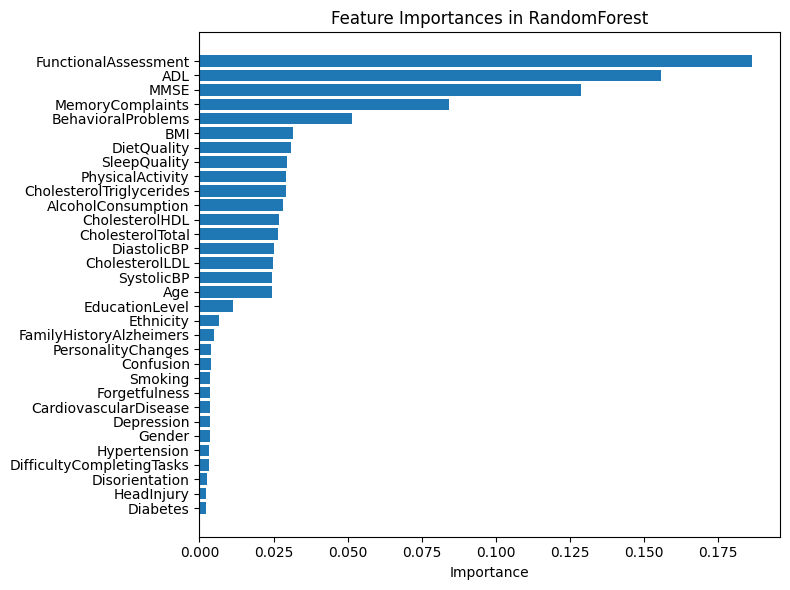

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# 1. 데이터 로드
df = pd.read_csv("alzheimers_disease_data.csv")

# 2. 숫자형 피처만 추출, 'Diagnosis'와 'PatientID' 제외
feature_cols = df.select_dtypes(include=[np.number]).columns.difference(['Diagnosis', 'PatientID'])
X = df[feature_cols]
y = df['Diagnosis']

# 3. 학습/테스트 분리
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# 4. RandomForest 모델 학습
rf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf.fit(X_train, y_train)

# 5. 변수 중요도 계산
importances = pd.Series(rf.feature_importances_, index=feature_cols).sort_values(ascending=False)
top10 = importances

# 6. 숫자 값으로 출력
print("🎯 RandomForest Feature Importances:\n")
for feature, imp in top10.items():
    print(f"{feature}: {imp:.4f}")

# 7. 그래프로 시각화
fig, ax = plt.subplots(figsize=(8, 6))
ax.barh(top10.index[::-1], top10.values[::-1])
ax.set_xlabel('Importance')
ax.set_title('Feature Importances in RandomForest')
plt.tight_layout()
plt.show()



--- Threshold: 0.10 ---
              precision    recall  f1-score   support

           0      0.000     0.000     0.000       417
           1      0.353     1.000     0.522       228

    accuracy                          0.353       645
   macro avg      0.177     0.500     0.261       645
weighted avg      0.125     0.353     0.185       645


--- Threshold: 0.15 ---
              precision    recall  f1-score   support

           0      0.000     0.000     0.000       417
           1      0.353     1.000     0.522       228

    accuracy                          0.353       645
   macro avg      0.177     0.500     0.261       645
weighted avg      0.125     0.353     0.185       645


--- Threshold: 0.20 ---
              precision    recall  f1-score   support

           0      0.650     0.031     0.059       417
           1      0.354     0.969     0.518       228

    accuracy                          0.363       645
   macro avg      0.502     0.500     0.289       645

c:\Users\use08\anaconda3\envs\ml_env\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\use08\anaconda3\envs\ml_env\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\use08\anaconda3\envs\ml_env\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\U

              precision    recall  f1-score   support

           0      0.704     0.854     0.771       417
           1      0.561     0.342     0.425       228

    accuracy                          0.673       645
   macro avg      0.632     0.598     0.598       645
weighted avg      0.653     0.673     0.649       645


--- Threshold: 0.55 ---
              precision    recall  f1-score   support

           0      0.694     0.882     0.777       417
           1      0.574     0.289     0.385       228

    accuracy                          0.673       645
   macro avg      0.634     0.586     0.581       645
weighted avg      0.652     0.673     0.638       645


--- Threshold: 0.60 ---
              precision    recall  f1-score   support

           0      0.693     0.909     0.786       417
           1      0.612     0.263     0.368       228

    accuracy                          0.681       645
   macro avg      0.653     0.586     0.577       645
weighted avg      0.664 

c:\Users\use08\anaconda3\envs\ml_env\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\use08\anaconda3\envs\ml_env\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\use08\anaconda3\envs\ml_env\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


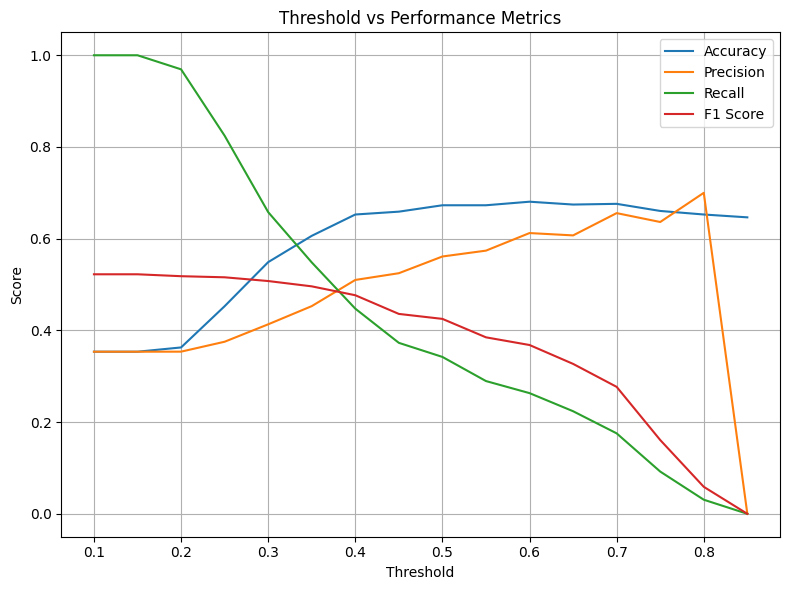

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# 1. CSV 파일 로드
df = pd.read_csv("alzheimers_disease_data.csv")

# 2. (필요 시) BMI_category 더미 생성
if 'BMI_category' in df.columns:
    df = pd.get_dummies(df, columns=['BMI_category'], drop_first=True)

# 3. 입력 변수 정의
base_features = [
    'Gender', 'AlcoholConsumption', 'PhysicalActivity', 'SleepQuality',
    'FamilyHistoryAlzheimers', 'CholesterolTriglycerides', 'DietQuality',
    'BMI', 'MemoryComplaints'
]
bmi_dummies = [col for col in df.columns if col.startswith('BMI_category_')]
features = base_features + bmi_dummies

X = df[features]
y = df['Diagnosis']

# 4. 학습/테스트 분할 및 스케일링
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 5. 앙상블 모델 정의 및 학습
log_clf = LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)
rf_clf = RandomForestClassifier(class_weight='balanced', n_estimators=100, random_state=42)
svm_clf = SVC(kernel='rbf', probability=True, class_weight='balanced', random_state=42)
pos_weight = (y_train == 0).sum() / (y_train == 1).sum()
xgb_clf = XGBClassifier(scale_pos_weight=pos_weight, eval_metric='logloss', random_state=42)

voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rf_clf), ('svm', svm_clf), ('xgb', xgb_clf)],
    voting='soft'
)
voting_clf.fit(X_train_scaled, y_train)

# 6. 임계값별 확률 예측 및 성능 계산
y_proba = voting_clf.predict_proba(X_test_scaled)[:, 1]
thresholds = np.arange(0.1, 0.9, 0.05)
metrics = []

for t in thresholds:
    y_pred = (y_proba >= t).astype(int)
    print(f"\n--- Threshold: {t:.2f} ---")
    print(classification_report(y_test, y_pred, digits=3))
    metrics.append({
        'threshold': t,
        'accuracy': accuracy_score(y_test, y_pred),
        'precision': precision_score(y_test, y_pred, zero_division=0),
        'recall': recall_score(y_test, y_pred),
        'f1_score': f1_score(y_test, y_pred)
    })

metrics_df = pd.DataFrame(metrics)

# 7. 결과 출력 (표 + 그래프)
print("\n🎯 Threshold 조정에 따른 Performance Metrics\n")
print(metrics_df.to_string(index=False, formatters={
    'threshold': '{:.2f}'.format,
    'accuracy': '{:.3f}'.format,
    'precision': '{:.3f}'.format,
    'recall': '{:.3f}'.format,
    'f1_score': '{:.3f}'.format
}))

plt.figure(figsize=(8,6))
plt.plot(metrics_df['threshold'], metrics_df['accuracy'], label='Accuracy')
plt.plot(metrics_df['threshold'], metrics_df['precision'], label='Precision')
plt.plot(metrics_df['threshold'], metrics_df['recall'], label='Recall')
plt.plot(metrics_df['threshold'], metrics_df['f1_score'], label='F1 Score')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Threshold vs Performance Metrics')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


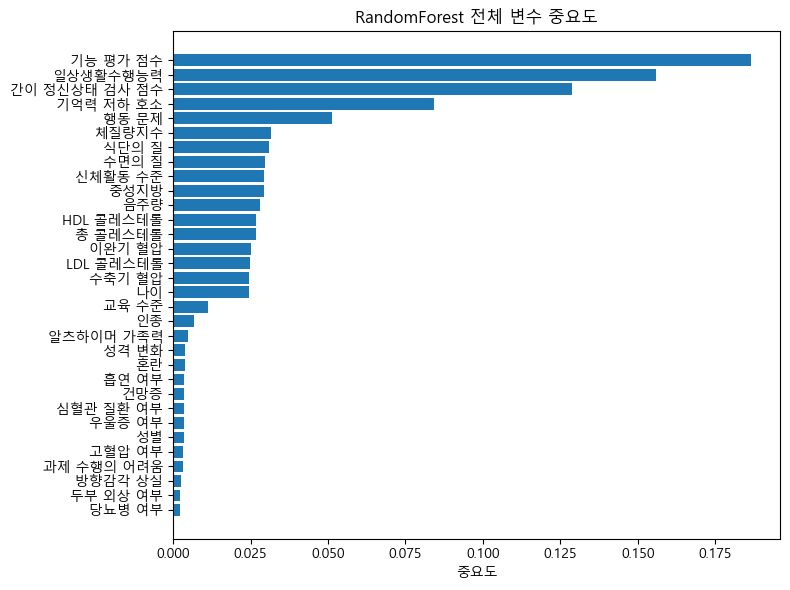

In [4]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# 1) CSV 파일 로드 (경로만 알맞게 수정하세요)
df = pd.read_csv("alzheimers_disease_data.csv")

# 2) 숫자형 피처만 골라내고, 진단·ID 열은 제외
feature_cols = df.select_dtypes(include=[np.number]).columns.difference(['Diagnosis', 'PatientID'])
X = df[feature_cols]
y = df['Diagnosis']

# 3) 학습/테스트 분할
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# 4) RandomForest 학습
rf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf.fit(X_train, y_train)

# 5) 변수 중요도 계산 및 정렬
importances = pd.Series(rf.feature_importances_, index=feature_cols).sort_values()

# 6) 영어→한글 매핑 딕셔너리
mapping = {
    'Age':'나이','Gender':'성별','Ethnicity':'인종','EducationLevel':'교육 수준',
    'BMI':'체질량지수','Smoking':'흡연 여부','AlcoholConsumption':'음주량',
    'PhysicalActivity':'신체활동 수준','DietQuality':'식단의 질','SleepQuality':'수면의 질',
    'FamilyHistoryAlzheimers':'알츠하이머 가족력','CardiovascularDisease':'심혈관 질환 여부',
    'Diabetes':'당뇨병 여부','Depression':'우울증 여부','HeadInjury':'두부 외상 여부',
    'Hypertension':'고혈압 여부','SystolicBP':'수축기 혈압','DiastolicBP':'이완기 혈압',
    'CholesterolTotal':'총 콜레스테롤','CholesterolLDL':'LDL 콜레스테롤',
    'CholesterolHDL':'HDL 콜레스테롤','CholesterolTriglycerides':'중성지방',
    'MMSE':'간이 정신상태 검사 점수','FunctionalAssessment':'기능 평가 점수',
    'MemoryComplaints':'기억력 저하 호소','BehavioralProblems':'행동 문제',
    'ADL':'일상생활수행능력','Confusion':'혼란','Disorientation':'방향감각 상실',
    'PersonalityChanges':'성격 변화','DifficultyCompletingTasks':'과제 수행의 어려움',
    'Forgetfulness':'건망증'
}

# 7) 한글 이름 리스트로 변환
korean_names = [mapping.get(feat, feat) for feat in importances.index]

# 8) 전체 변수 중요도 그래프
plt.figure(figsize=(8, 6))
plt.barh(korean_names, importances.values)
plt.xlabel('중요도')
plt.title('RandomForest 전체 변수 중요도')
plt.tight_layout()
plt.show()


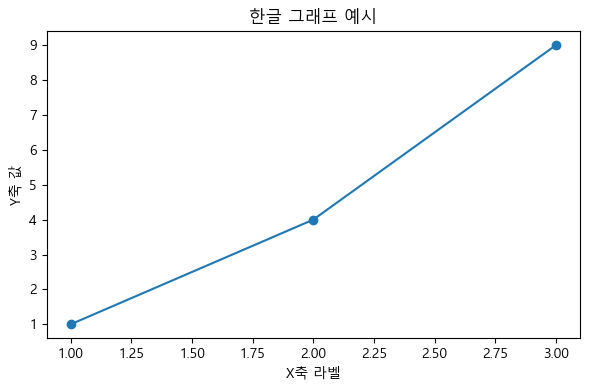

In [2]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from pathlib import Path

# 한글 폰트 설정 함수
def set_korean_font():
    # 환경별 한글 폰트 경로
    font_paths = [
        "C:/Windows/Fonts/malgun.ttf",                     # Windows
        "/usr/share/fonts/truetype/nanum/NanumGothic.ttf", # Linux
        "/System/Library/Fonts/AppleSDGothicNeo.ttc"       # macOS
    ]
    for font_path in font_paths:
        if Path(font_path).exists():
            font_prop = fm.FontProperties(fname=font_path)
            plt.rc('font', family=font_prop.get_name())
            break
    plt.rcParams['axes.unicode_minus'] = False  # 마이너스 깨짐 방지

# 폰트 설정 적용
set_korean_font()

# 샘플 그래프 그리기
plt.figure(figsize=(6,4))
plt.plot([1, 2, 3], [1, 4, 9], marker='o')
plt.title('한글 그래프 예시')
plt.xlabel('X축 라벨')
plt.ylabel('Y축 값')
plt.tight_layout()
plt.show()
